In [41]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons

# Moons

In [3]:
X, y = make_moons(n_samples=2**10, noise=0.1, random_state=42)
data = pd.DataFrame(np.hstack([X, y.reshape(-1 ,1)]))
data.to_csv("../data/moons.csv", index=False, header=None)

# HELOC

## Feature selection

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

heloc_df = pd.read_csv("../data/heloc.csv")
heloc_df['RiskPerformance'] = heloc_df['RiskPerformance'].map({'Bad': 0, 'Good': 1})

# Prepare the data for modeling
X = heloc_df.drop('RiskPerformance', axis=1)
y = heloc_df['RiskPerformance']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the training data
X_train = scaler.fit_transform(X_train)

# Scale the testing data
X_test = scaler.transform(X_test)


# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf_model.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances


,importance
ExternalRiskEstimate,0.119839
NetFractionRevolvingBurden,0.087127
AverageMInFile,0.082773
MSinceOldestTradeOpen,0.067309
PercentTradesWBalance,0.057867
PercentInstallTrades,0.054519
NumSatisfactoryTrades,0.053210
NumTotalTrades,0.047593
MSinceMostRecentInqexcl7days,0.045181
PercentTradesNeverDelq,0.044060


Optimal number of features: 18


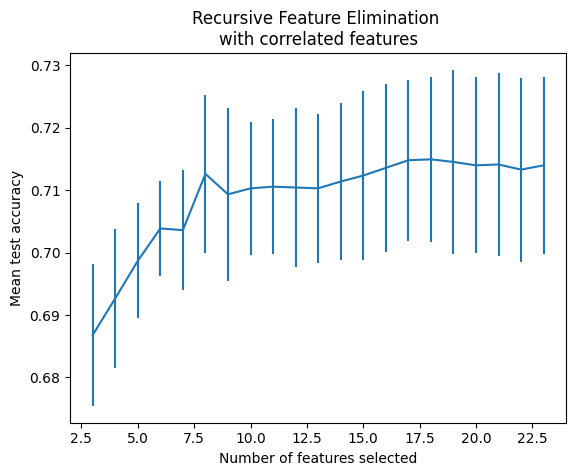

Index(['ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NumRevolvingTradesWBalance',
       'NumInstallTradesWBalance'],
      dtype='object')


In [30]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

min_features_to_select = 3  # Minimum number of features to consider
clf = LogisticRegression(max_iter=200)
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

selected_features_rfecv = X.columns[rfecv.support_]
print(selected_features_rfecv)

## prepr

In [35]:
df = pd.read_csv("../data/heloc.csv")
df['RiskPerformance'] = df['RiskPerformance'].map({'Bad': 0, 'Good': 1})

In [41]:
target_column = 'RiskPerformance'
feature_columns = df.columns.drop(target_column)
df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,0,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,0,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,0,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,0,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,0,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,1,73,131,5,57,21,0,0,95,80,...,19,7,0,0,26,-8,5,2,0,100
10455,0,65,147,39,68,11,0,0,92,28,...,42,1,1,1,86,53,2,2,1,80
10456,0,74,129,6,64,18,1,1,100,-7,...,33,3,4,4,6,-8,5,-8,0,56
10457,0,72,234,12,113,42,2,2,96,35,...,20,6,0,0,19,-8,4,1,0,38


# Adult

In [23]:
df = pd.read_csv("../data/adult.csv")

In [24]:
df.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation', 'race',
       'gender', 'hours_per_week', 'income'],
      dtype='object')

In [34]:
df = pd.concat([
    df[df["income"] == 0].sample(df["income"].sum(), random_state=42),
    df[df["income"] == 1],
])

In [36]:
df["income"].value_counts()

income
0    7841
1    7841
Name: count, dtype: int64

In [49]:
df["workclass"].value_counts()
# df["education"].value_counts()
# df["marital_status"].value_counts()
# df["occupation"].value_counts()
df["gender"].value_counts()
df["race"].value_counts()

race
White    13684
Other     1998
Name: count, dtype: int64

In [43]:
df

,age,workclass,education,marital_status,occupation,race,gender,hours_per_week,income
3326,32,Private,Some-college,Divorced,Blue-Collar,White,Female,54,0
26225,19,Other/Unknown,HS-grad,Single,Other/Unknown,Other,Female,25,0
6130,51,Private,Bachelors,Divorced,Professional,White,Male,45,0
2211,27,Private,HS-grad,Single,Service,White,Female,42,0
12946,64,Self-Employed,Some-college,Widowed,Blue-Collar,White,Female,8,0
...,...,...,...,...,...,...,...,...,...
32539,71,Other/Unknown,Doctorate,Married,Other/Unknown,White,Male,10,1
32545,39,Government,Assoc,Married,White-Collar,White,Female,20,1
32554,53,Private,Masters,Married,White-Collar,White,Male,40,1
32557,40,Private,HS-grad,Married,Blue-Collar,White,Male,40,1


# LAW

In [3]:
df_law = pd.read_csv("../data/law.csv")
columns = ["lsat", "gpa", "zfygpa","pass_bar", "sex", "race"]
df_law = df_law[columns]
df_law.dropna().corr()

,lsat,gpa,zfygpa,pass_bar,sex,race
lsat,1.000000,0.240119,0.281947,0.237735,0.079689,0.286040
gpa,0.240119,1.000000,0.173542,0.143416,-0.135629,0.170242
zfygpa,0.281947,0.173542,1.000000,0.243718,0.045554,0.271313
pass_bar,0.237735,0.143416,0.243718,1.000000,0.025521,0.174520
sex,0.079689,-0.135629,0.045554,0.025521,1.000000,0.078298
race,0.286040,0.170242,0.271313,0.174520,0.078298,1.000000


In [11]:
df_law["race"].value_counts()

race
7.0    18716
3.0     1343
2.0      897
6.0      506
4.0      396
8.0      303
5.0      125
1.0      105
Name: count, dtype: int64

In [10]:
sum(df_law["pass_bar"] == 0)

1169

# Compas

In [4]:
df = pd.read_csv("../data/compas_two_years.csv", index_col="id")

In [5]:
columns = ['age', 'sex', 'race', 'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
               'c_charge_degree', 'is_recid', 'is_violent_recid', 'two_year_recid', 'decile_score', 'score_text']
df = df[columns]
df['days_b_screening_arrest'] = np.abs(df['days_b_screening_arrest'])
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
df['length_of_stay'] = np.abs((df['c_jail_out'] - df['c_jail_in']).dt.days)
df['length_of_stay'].fillna(df['length_of_stay'].value_counts().index[0], inplace=True)
df['days_b_screening_arrest'].fillna(df['days_b_screening_arrest'].value_counts().index[0], inplace=True)
df['length_of_stay'] = df['length_of_stay'].astype(int)
df['days_b_screening_arrest'] = df['days_b_screening_arrest'].astype(int)
df = df[df["score_text"] != "Medium"]
df["class"] = pd.get_dummies(df["score_text"])["High"].astype(int)
df.drop(['c_jail_in', 'c_jail_out', 'decile_score', 'score_text'], axis=1, inplace=True)

In [6]:
df

,age,sex,race,priors_count,days_b_screening_arrest,c_charge_degree,is_recid,is_violent_recid,two_year_recid,length_of_stay,class
id,,,,,,,,,,,
1,69,Male,Other,0,1,F,0,0,0,0,0
3,34,Male,African-American,0,1,F,1,1,1,10,0
4,24,Male,African-American,4,1,F,1,0,1,1,0
5,23,Male,African-American,1,1,F,0,0,0,0,1
6,43,Male,Other,2,1,F,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10995,20,Male,African-American,0,1,F,0,0,0,0,1
10997,23,Male,African-American,0,1,F,0,0,0,1,0
10999,57,Male,Other,0,1,F,0,0,0,1,0


# German credit

In [55]:
df = pd.read_csv("../data/german_credit.csv")

In [70]:
df["default"].value_counts()

default
0    700
1    300
Name: count, dtype: int64

# MNIST

In [71]:
from sklearn.datasets import load_digits

In [79]:
X, y = load_digits(n_class=2, return_X_y=True)

In [80]:
X.shape

(360, 64)

In [84]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load the MNIST dataset
X, y = load_digits(n_class=2, return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [85]:
X_train_pca.shape

(288, 19)

# Polish bankruptcy

In [1]:
import pandas as pd
import os

def convert_arff_to_csv(arff_path):
    # Using pandas to read the ARFF file
    # skiprows is used to skip the file's header information
    data = pd.read_csv(arff_path, comment='@', header=None)
    
    # Extracting the attribute names from the file
    attribute_names = []
    with open(arff_path, 'r') as file:
        for line in file:
            if line.startswith('@attribute'):
                attribute_name = line.split(' ')[1].strip()
                attribute_names.append(attribute_name)

    # Assigning the attribute names to the dataframe columns
    data.columns = attribute_names

    # Saving to a CSV file
    csv_path = arff_path.replace('.arff', '.csv')
    # data.to_csv(csv_path, index=False)

    return data

# csv_file_path = convert_arff_to_csv(file_path)
# csv_file_path


In [35]:
import numpy as np
df = pd.read_csv("../data/polish_bankruptcy.csv")
# map values in the df from '?' to np.nan
df = df.replace('?', np.nan)
df.shape

/var/folders/zx/yxz7rcp937j5xxx6svjlpc180000gn/T/ipykernel_7437/4158031113.py:2: DtypeWarning: Columns (0,1,2,4,5,6,8,9,10,12,13,14,17,18,19,21,22,24,28,29,30,34,35,37,38,41,42,43,47,48,50,54,55,56,57,58,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/polish_bankruptcy.csv")


(43405, 65)

In [36]:
df = df.loc[:, df.isnull().mean() < 0.01].dropna()
import numpy as np

# corr_matrix = df.corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# df.drop(to_drop, axis=1, inplace=True)

In [37]:
df.shape

(42705, 54)

In [38]:
df["class"].value_counts()

class
0    40682
1     2023
Name: count, dtype: int64

In [39]:
df = pd.concat([
    df[df["class"] == 0].sample(df["class"].sum(), random_state=42),
    df[df["class"] == 1],
])

In [40]:
df.shape

(4046, 54)

In [2]:
arff_paths = [f"../data/{p}" for p in os.listdir("../data") if p.endswith(".csv")]

dfs = []
for arff_path in arff_paths:
    df = convert_arff_to_csv(arff_path)
    dfs.append(df)
df = pd.concat(dfs)
df.to_csv("../data/polish_bankruptcy.csv", index=False)

ValueError: No objects to concatenate

# Audit

In [42]:
import pandas as pd

In [43]:
df = pd.read_csv("../data/audit.csv")

In [47]:
df.corr()

ValueError: could not convert string to float: 'LOHARU'

In [48]:
df = df[df.columns[2:]]

In [56]:
df["Risk"].value_counts()

Risk
0    471
1    305
Name: count, dtype: int64

In [58]:
df["Audit_Risk"].corr(df["Risk"])

0.2171127468209174